EDA with Python and applying Logistic Regression (with Titanic Data Set from Kaggle)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
train = pd.read_csv('titanic_train.csv')

In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Data

In [130]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

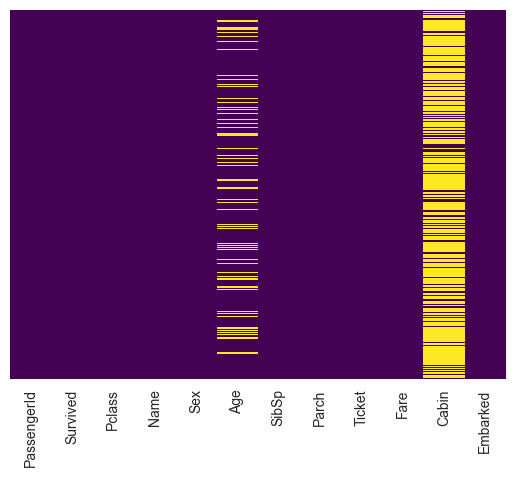

In [131]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

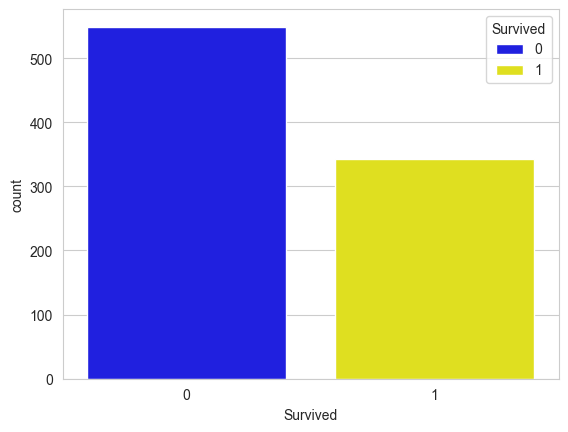

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Survived', data=train, palette=['blue', 'yellow'])

<Axes: xlabel='Survived', ylabel='count'>

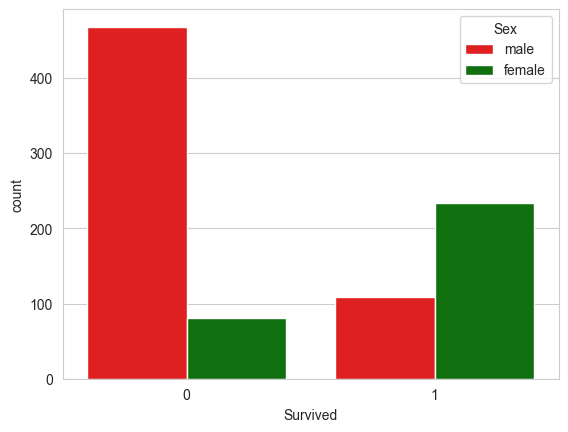

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette=['red', 'green'])

<Axes: xlabel='Survived', ylabel='count'>

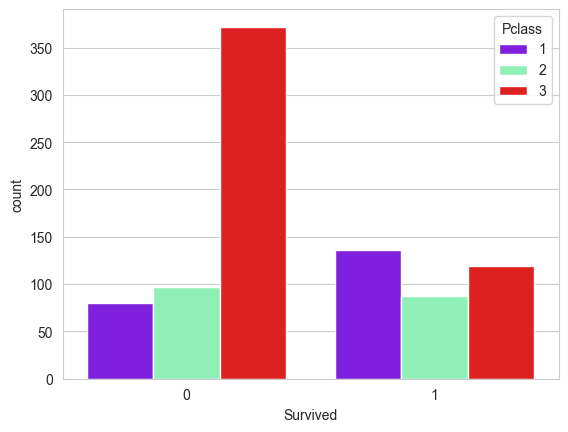

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

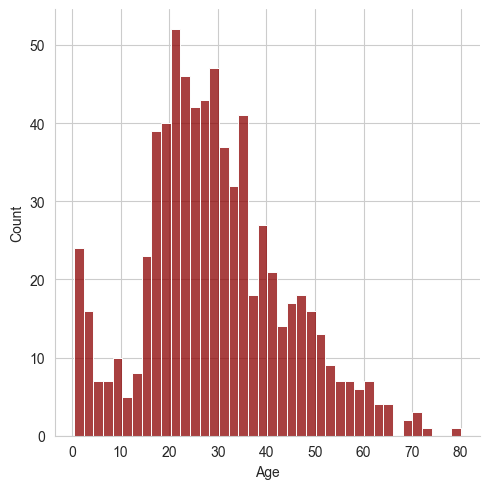

In [135]:
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)


<Axes: >

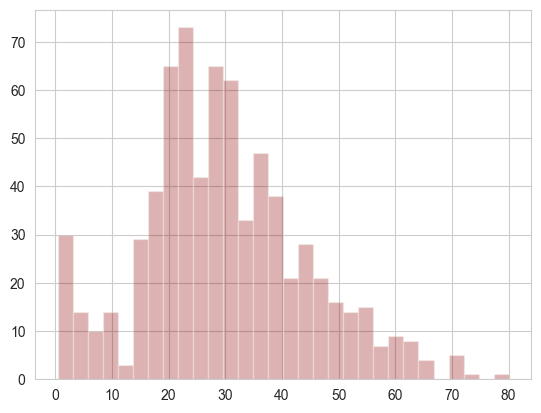

In [136]:
train['Age'].hist(bins=30, color='darkred', alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

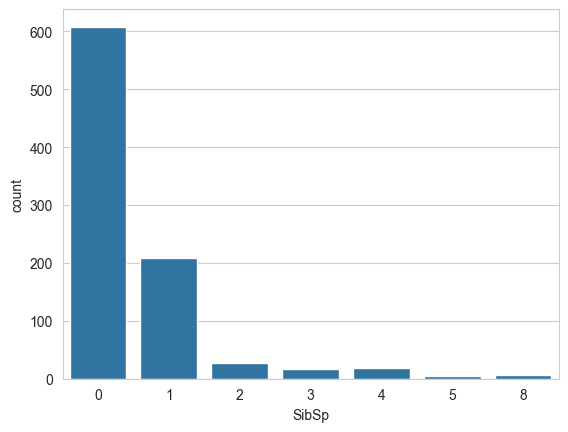

In [137]:
sns.countplot(x='SibSp', data=train)

<Axes: >

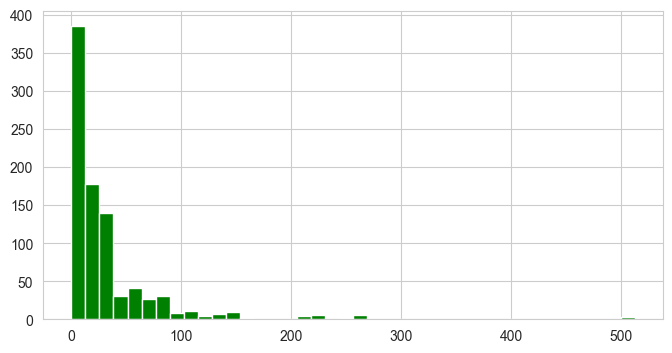

In [138]:
train['Fare'].hist(color='green',bins=40, figsize=(8,4))

DATA CLEANING

C:\Users\Meghali\AppData\Local\Temp\ipykernel_17184\1152948113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

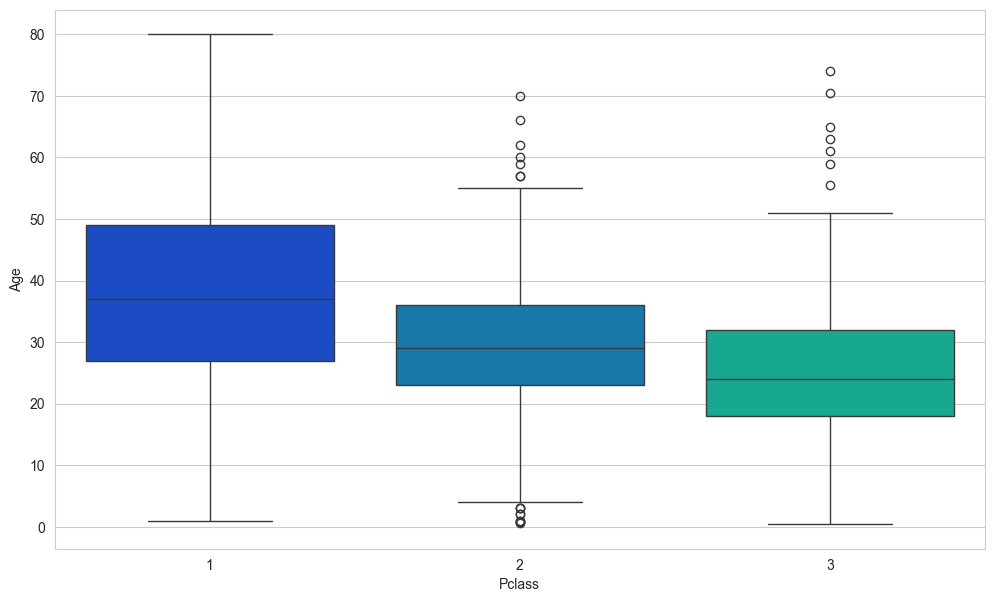

In [139]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [140]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [141]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

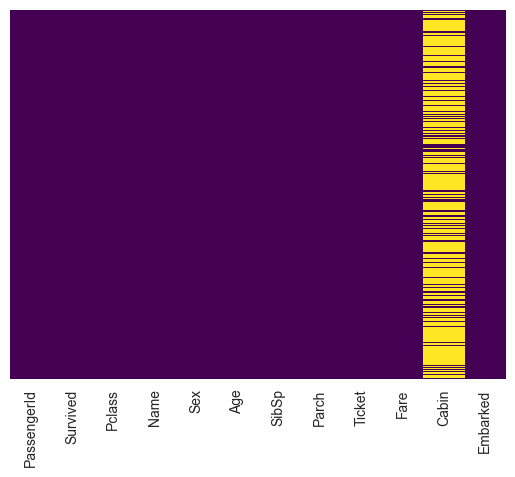

In [142]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [143]:
train.drop('Cabin', axis=1, inplace=True)

In [144]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [145]:
train.dropna(inplace=True)

<Axes: >

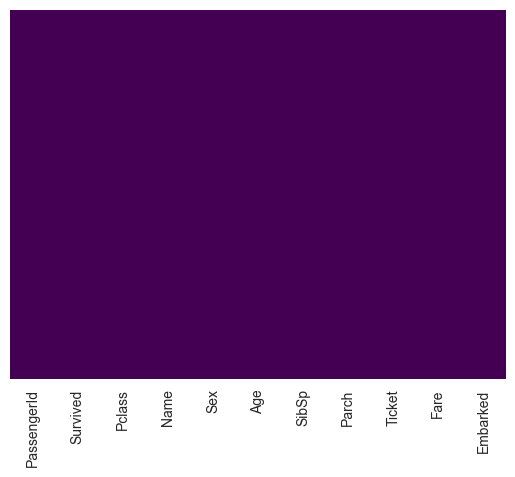

In [146]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [148]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [149]:
train['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [150]:
embarked_dummies = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, embarked_dummies], axis=1)
embarked_dummies.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [151]:
print(train['Embarked'].dtype)


object


In [152]:
embarked_dummies = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
print(embarked_dummies.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [153]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,True


In [154]:
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

In [155]:
# 2️⃣ Drop the original categorical columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

# 3️⃣ Concatenate the new dummy columns
train = pd.concat([train, sex, embark], axis=1)

# 4️⃣ Check the final DataFrame
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,False,True,1,0,1
1,2,1,1,38.0,1,0,71.2833,False,False,0,0,0
2,3,1,3,26.0,0,0,7.9250,False,True,0,0,1
3,4,1,1,35.0,1,0,53.1000,False,True,0,0,1
4,5,0,3,35.0,0,0,8.0500,False,True,1,0,1


In [156]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,False,True,1,0,1
1,2,1,1,38.0,1,0,71.2833,False,False,0,0,0
2,3,1,3,26.0,0,0,7.9250,False,True,0,0,1
3,4,1,1,35.0,1,0,53.1000,False,True,0,0,1
4,5,0,3,35.0,0,0,8.0500,False,True,1,0,1


In [159]:
# Remove duplicates if they exist
train = train.loc[:, ~train.columns.duplicated()]


In [160]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,False,True,1
1,2,1,1,38.0,1,0,71.2833,False,False,0
2,3,1,3,26.0,0,0,7.9250,False,True,0
3,4,1,1,35.0,1,0,53.1000,False,True,0
4,5,0,3,35.0,0,0,8.0500,False,True,1


In [165]:
# Ensure there are no duplicate columns
train = train.loc[:, ~train.columns.duplicated()]

In [166]:
# Encode Sex column if it exists
if 'Sex' in train.columns:
    sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
else:
    sex = pd.DataFrame()


In [167]:
# Encode Embarked column if it exists
if 'Embarked' in train.columns:
    embark = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
else:
    embark = pd.DataFrame()

In [168]:
# Drop unused categorical columns (only those that exist)
train.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], errors='ignore', inplace=True)

In [169]:
# Concatenate encoded columns
train = pd.concat([train, sex, embark], axis=1)

# Show result
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Building a Logistic Regression Model

In [170]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [171]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64